# Dataset Description

Decription of The Dataset
1. Carat : Carat weight of the Diamond.
2. Cut : Describe cut quality of the diamond.
3. Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
4. Color : Color of the Diamond.
With D being the best and J the worst.
5. Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
6. Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
7. Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
8. Price : The Price of the Diamond.
9. x : Length of the Diamond in mm.
10. y : Width of the Diamond in mm.
11. z : Height of the Diamond in mm.

Target Variable is price.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv("diamonds.csv")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.duplicated().sum()

146

We have 146 duplicates value in our data, so we have to remove them.

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Duplicate data are removed now.

# E.D.A.

In [9]:
df['clarity'].value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

In [10]:
def dist(i):
  plt.figure(figsize=(10,6))
  sns.distplot(df[i])
  plt.show()

In [11]:
def plot(i):
  plt.figure(figsize=(10,6))
  sns.countplot(df[i])
  plt.show()

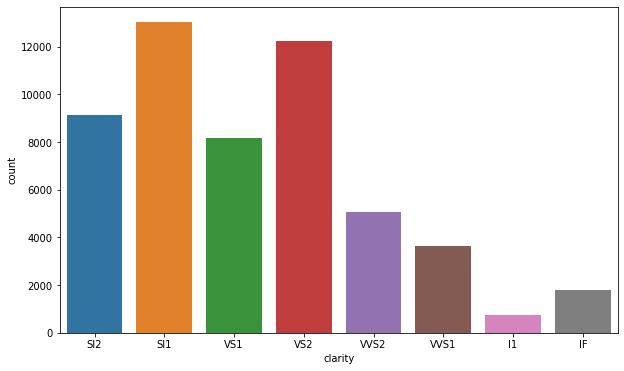

In [12]:
plot('clarity')

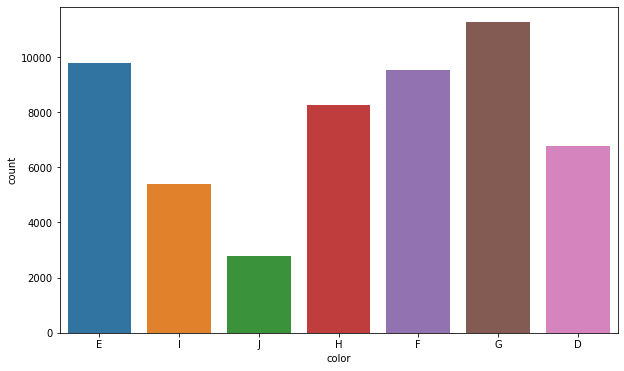

In [13]:
plot('color')

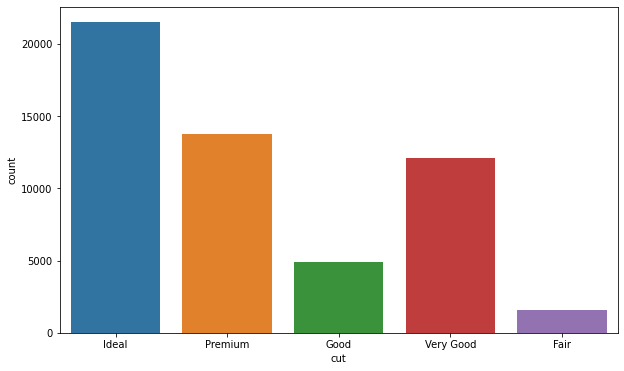

In [14]:
plot('cut')

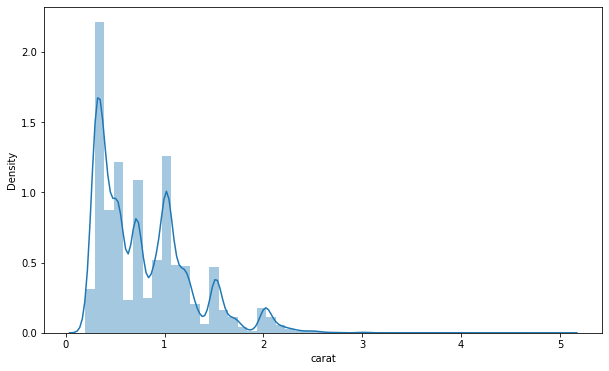

In [15]:
dist('carat')

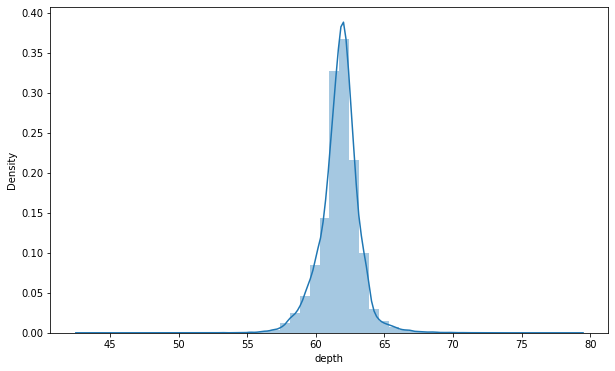

In [16]:
dist('depth')

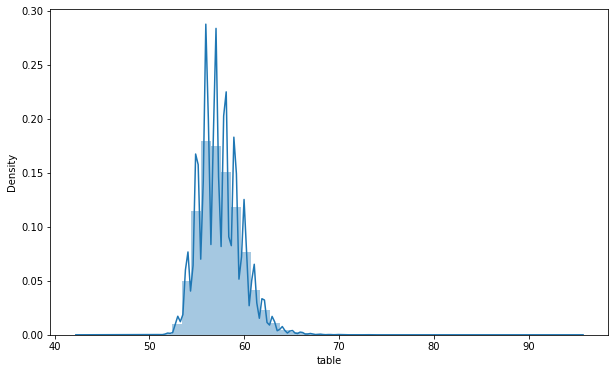

In [17]:
dist('table')

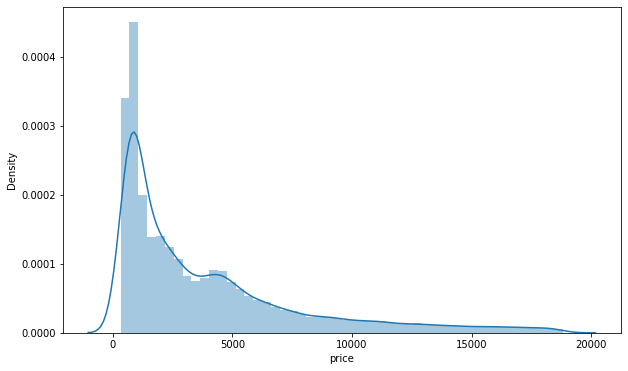

In [18]:
dist('price')

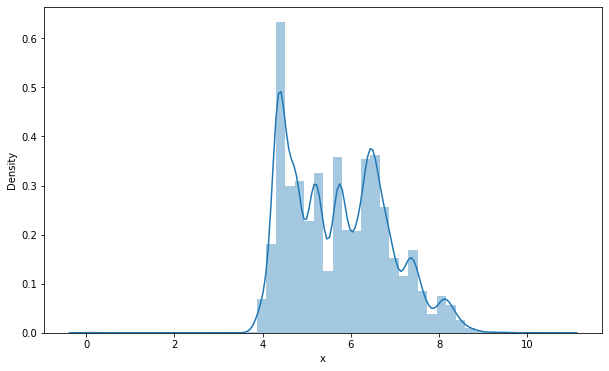

In [19]:
dist('x')

x has some zero values.

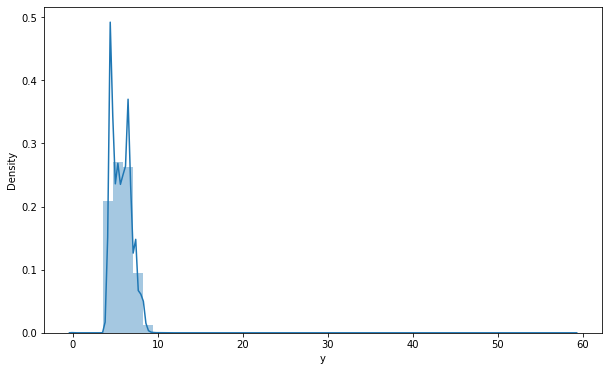

In [20]:
dist('y')

y also have some zero values.

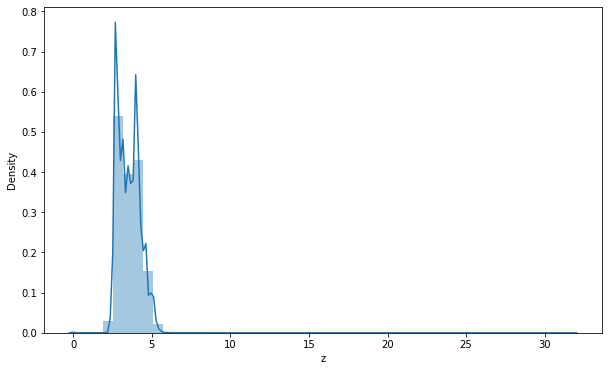

In [21]:
dist('z')

z also have some zero values.

Dimension can't be zero, so it may be a missing value or wrong entered data.

In [22]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

19

We have only few zeros, so we can drop them without lossing any important information.

In [23]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [24]:
num_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
num_feat

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

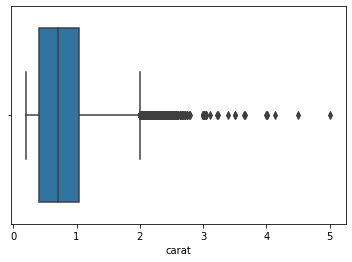

In [25]:
sns.boxplot(df['carat'])

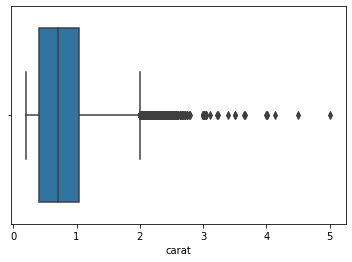

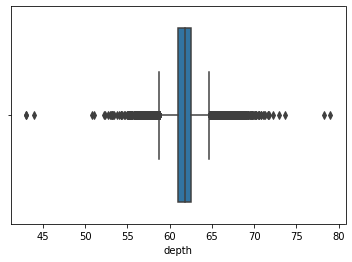

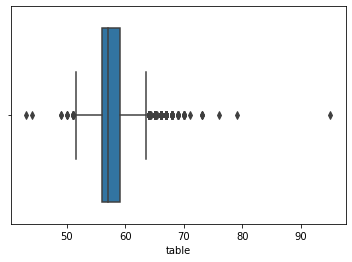

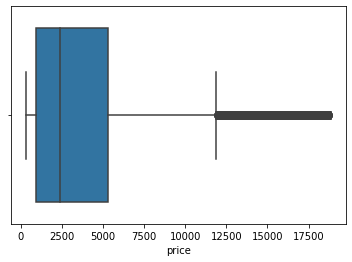

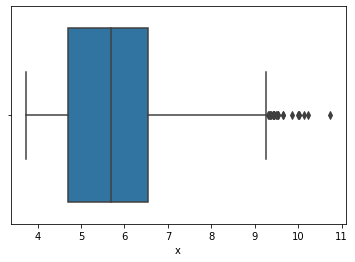

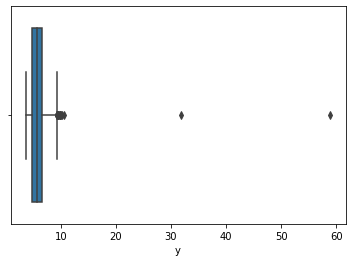

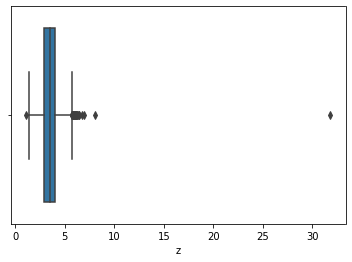

In [26]:
for i in num_feat:
  plt.figure(i)
  sns.boxplot(df[i])

## Bivarent Analysis

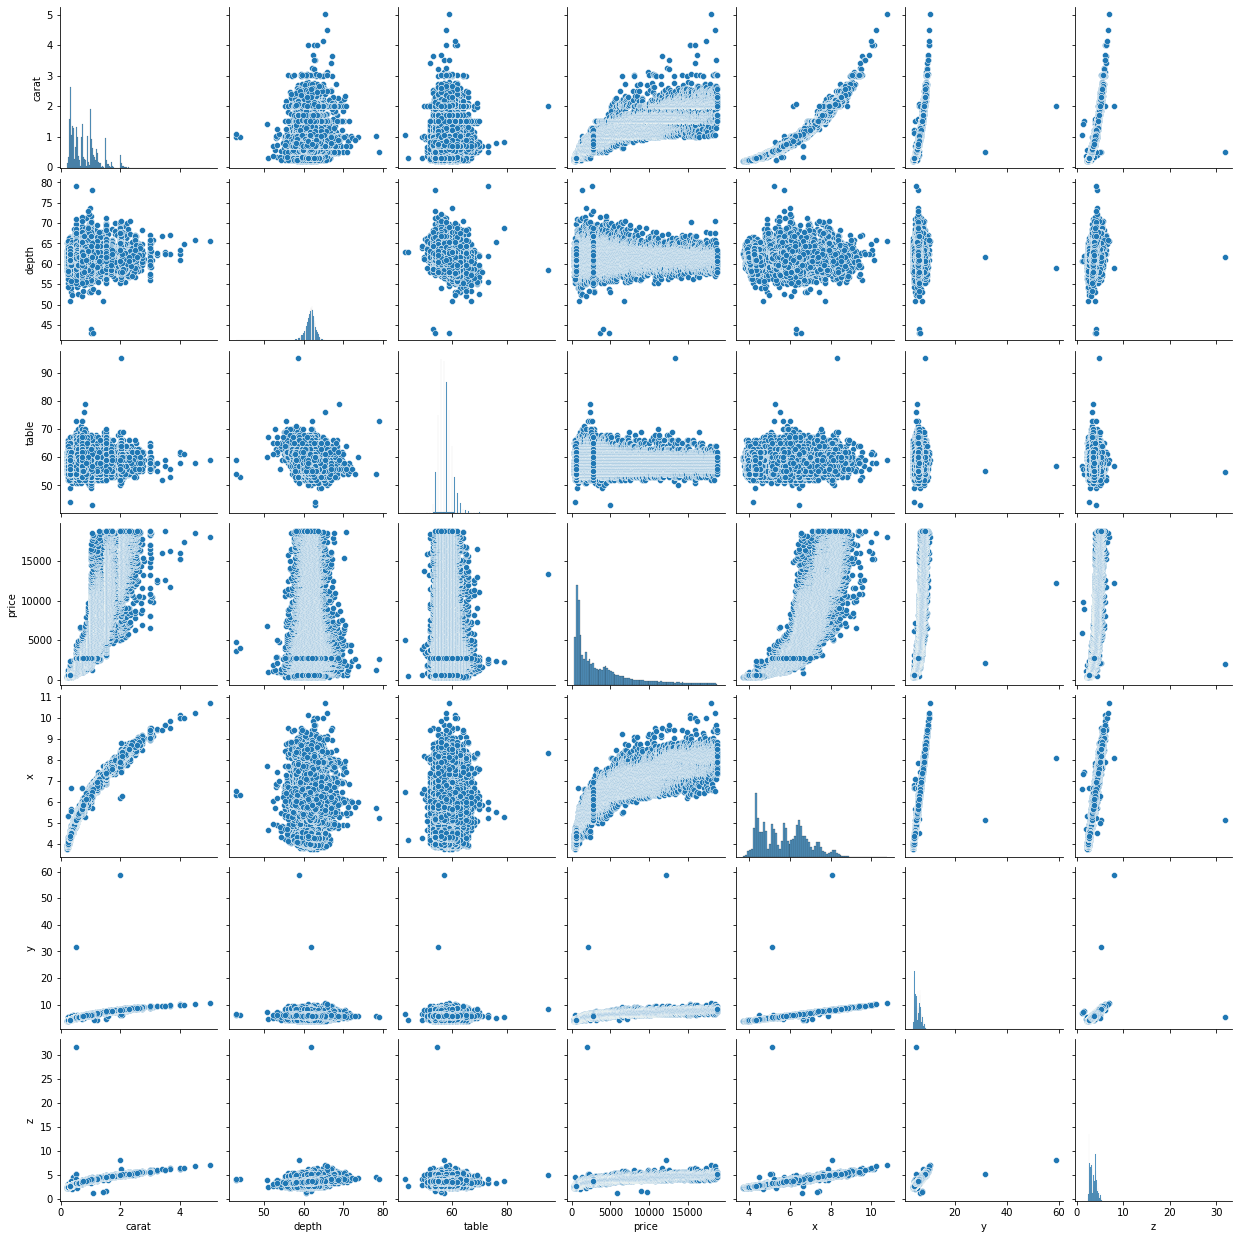

In [27]:
sns.pairplot(df)

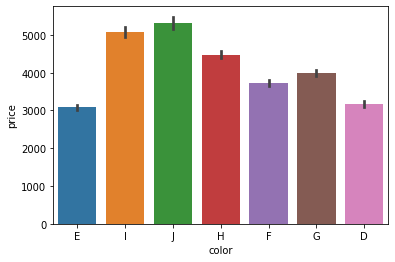

In [28]:
sns.barplot(x = df['color'], y = df['price'])

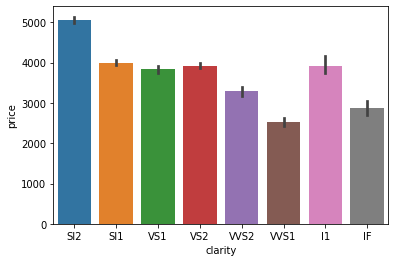

In [29]:
sns.barplot(x = df['clarity'], y= df['price'])

# Handling Outliers

In [30]:
Q1 = df[num_feat].quantile(0.25)
Q3 = df[num_feat].quantile(0.75)
IQR = Q3 - Q1
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
data = df[~((df[num_feat] < ll)|(df[num_feat] > ul)).any(axis=1)]

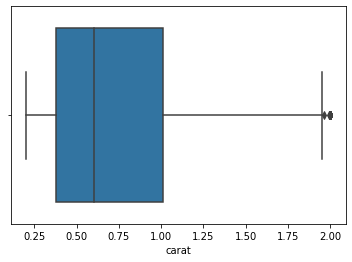

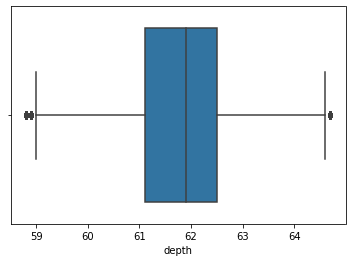

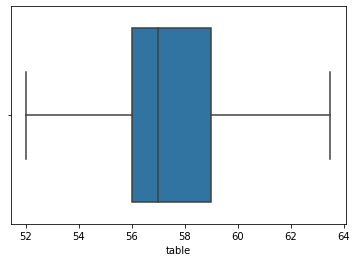

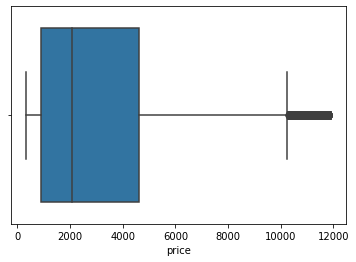

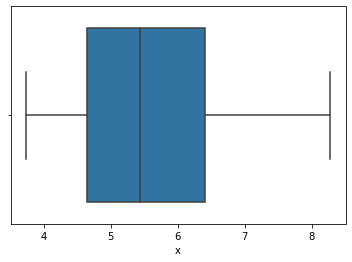

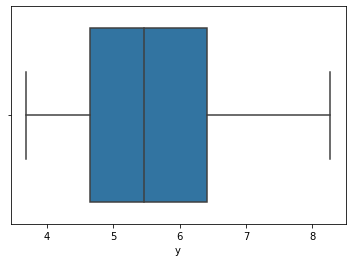

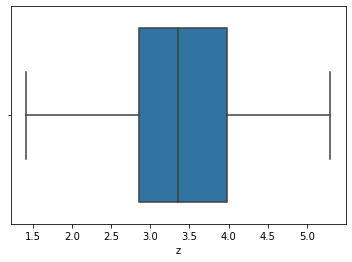

In [31]:
for i in num_feat:
  plt.figure(i)
  sns.boxplot(data[i])

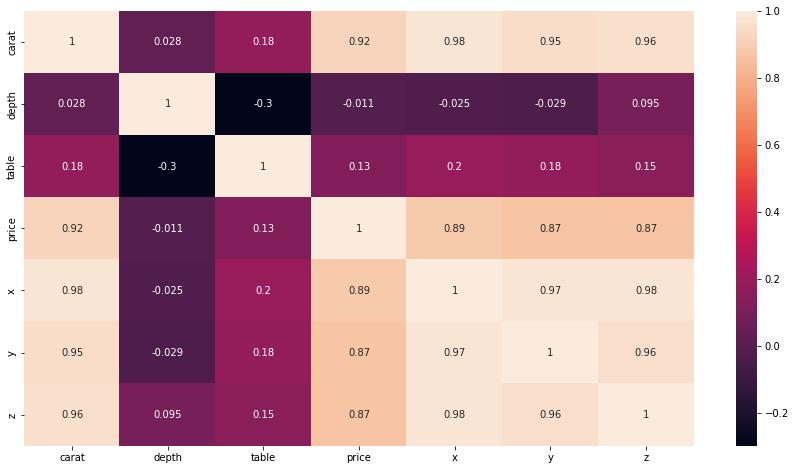

In [32]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

1. Carat is highly corelated to price.
2. x,y and z, all dimensions are also corelated with price.
3. Dimesion are also highly corelated with each other, so we have to make a new feature for them.

In [33]:
df['dimension'] = df['x']*df['y']*df['z']
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,dimension
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885


In [34]:
df.drop(['x','y','z'], axis=1, inplace=True) # Droping x,y and z
df.head(3)

,carat,cut,color,clarity,depth,table,price,dimension
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885


# Encoding

All categorical variables are ordinal in nature, hence we will use Lable Encoder.

In [35]:
from sklearn.preprocessing import LabelEncoder
df['cut'] = LabelEncoder().fit_transform(df['cut'])
df['color'] = LabelEncoder().fit_transform(df['color'])
df['clarity'] = LabelEncoder().fit_transform(df['clarity'])
df.head(4)

,carat,cut,color,clarity,depth,table,price,dimension
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580


# Spliting Dataset

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Feature Scaling

In [37]:
X_train

,carat,cut,color,clarity,depth,table,dimension
32551,0.30,3,2,4,59.8,60.0,49.194340
42314,0.41,2,2,6,61.7,57.0,67.543200
4777,1.03,4,2,3,63.3,59.0,160.929320
10394,0.31,3,3,2,61.9,56.0,51.324840
10229,0.91,1,3,4,64.1,60.0,144.403740
...,...,...,...,...,...,...,...
46045,0.52,2,4,2,62.0,55.0,86.130720
52580,0.70,2,1,2,61.9,55.0,117.906488
42762,0.56,3,3,2,62.8,55.0,91.927968
43721,0.51,2,4,4,62.7,57.0,83.393280


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)

## Using the elbow method to find the optimal number of clusters

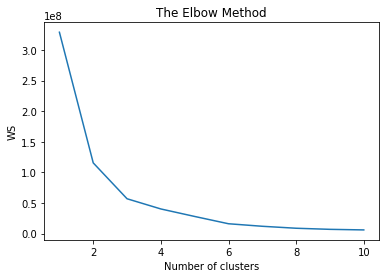

In [40]:
from sklearn.cluster import KMeans
ws = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    ws.append(kmeans.inertia_)
plt.plot(range(1, 11), ws)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WS')
plt.show()

From elbow method we can say that value of k must be 3.

# Model building from scratches

To build KNN model from scratches we need to follow following steps:
1. Calculate Euclidean distance.
2. Get nearest neighbours.

After completing above two steps we can make prediction.  

## Function for KNN model

In [41]:
class knn:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        results = []
        for i in X:
            distance = np.sqrt(np.sum((i-self.X)**2,axis=1))
            ind = distance.argsort()
            ind = ind[:self.k]
            results.append(np.mean(self.y[ind]))
        return np.array(results)

In [42]:
model=knn(k=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
scratch_model = r2_score(y_test,y_pred)
scratch_model

0.9570992833258207

In [44]:
from sklearn import metrics
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  828.7182243790403


# Actual KNN model

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [46]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, train_preds)
rmse = sqrt(mse)
rmse

828.7026261972209

In [48]:
actual_model = r2_score(y_test,train_preds)
actual_model

0.9571008982701084

In [49]:
print("Sratch model accuracy is : {} \nActual model accuracy is : {}".format(scratch_model,actual_model))

Sratch model accuracy is : 0.9570992833258207 
Actual model accuracy is : 0.9571008982701084
